### **MobileNet with Keras**

- Smaller model compared to VGG16 
- Size difference comes with number of parameters: 
    - VGG16 with ~138M parameters (528MB disk size)
    - MobileNet with ~4M parameters (17MB disk size)

- Advantages: 
    - it can work well for mobile devices 
- Disadvantage: 
    - The trade-off however comes with a catch, it won't have as much accuracy as the full size VGG16 model. 


Import packages

In [28]:
import numpy as np

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import itertools
import os
import shutil 
import random 
import matplotlib.pyplot as plt
%matplotlib inline


In [29]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  0


In [30]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [31]:
def prepare_image(file):
    img_path = 'mobilenet_data/data/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [43]:
# format the file structure a bit 

# get to the current working directory
# os.chdir('Documents/Deep-Learning-Chronicles/image_classification_CNN/mobilenet_data/data')
# os.getcwd()

directory = 'mobilenet_data/data/'
# List all files and sort them (to ensure 1, 2, 3 follow a consistent order)
files = sorted(os.listdir(directory))

# Start renaming
for count, filename in enumerate(files, start=1):
    # Get the file extension (e.g., .jpg, .png)
    extension = os.path.splitext(filename)[1]
    
    # Construct the old and new file paths
    src = os.path.join(directory, filename)
    dst = os.path.join(directory, f"{count}{extension}")
    
    # Rename using shutil
    shutil.move(src, dst)

print(f"Successfully renamed {len(files)} files.")
# os.listdir()


Successfully renamed 1000 files.


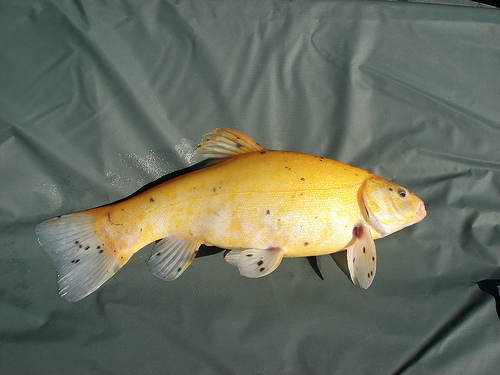

In [45]:
from IPython.display import Image
Image(filename='mobilenet_data/data/1.JPEG', width=300, height=200)
# os.listdir()

In [69]:
preprocessed_image = prepare_image('1.JPEG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


[[('n01440764', 'tench', np.float32(0.9938632)),
  ('n01443537', 'goldfish', np.float32(0.0050420123)),
  ('n02514041', 'barracouta', np.float32(0.00031603046)),
  ('n02655020', 'puffer', np.float32(0.00027977416)),
  ('n02641379', 'gar', np.float32(0.00021169377))]]

In [71]:
def predictImageData(filename):
    preprocessed_image = prepare_image(filename)
    predictions = mobile.predict(preprocessed_image)
    results = imagenet_utils.decode_predictions(predictions)
    return results

In [ ]:
# os.chdir('../../')
os.getcwd()
# os.listdir()

['2.ipynb',
 'image_classification.ipynb',
 'mobilenet_data',
 'mobilenet_image_classification.ipynb',
 'models']

In [93]:
predictImageData('814.JPEG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


[[('n04597913', 'wooden_spoon', np.float32(0.55577123)),
  ('n04263257', 'soup_bowl', np.float32(0.14952445)),
  ('n03775546', 'mixing_bowl', np.float32(0.108849436)),
  ('n07614500', 'ice_cream', np.float32(0.06241821)),
  ('n04270147', 'spatula', np.float32(0.032251623))]]

In [67]:
def predictImage(filename):
    preprocessed_image = prepare_image(filename)
    predictions = mobile.predict(preprocessed_image)
    results = imagenet_utils.decode_predictions(predictions)
    print("The image is: ", results[0][0][1])
    results

In [ ]:
predictImage('814.JPEG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
The image is:  wooden_spoon


Automated Prompt

In [110]:
file_input = input("Filename: ")
print("Short Answer")
print("="*15)
print()
predictImage(f'{file_input}.JPEG')
print("\n\n")
print("Reasoning: ")
print("="*15)
predictImageData(f'{file_input}.JPEG')

Short Answer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
The image is:  bakery



Reasoning: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


[[('n02776631', 'bakery', np.float32(0.33123714)),
  ('n07717410', 'acorn_squash', np.float32(0.10976226)),
  ('n07693725', 'bagel', np.float32(0.09815855)),
  ('n07720875', 'bell_pepper', np.float32(0.050552804)),
  ('n04476259', 'tray', np.float32(0.038406868))]]

### **Processing Images for Fine-Tuned MobileNet with Tensorflow's Keras API**

- Downloaded the data for sign languages expressing numbers 

Directory Structure:
- **mobilenetdata/Sign-Language-Digits-Dataset:**
    - **0:**
        - n images
    - **1:**
        - n images 
    - ...
    - **9:**
        - n images

In [116]:
# organize data into train, valid, test dirs
# os.getcwd()
os.chdir('mobilenet_data/Sign-Language-Digits-Dataset')
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')
        
        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../../')


In [118]:
# os.getcwd()
# ...\\Deep-Learning-Chronicles\\image_classification_CNN

### Preprocess the data

In [119]:
train_path = 'mobilenet_data/Sign-Language-Digits-Dataset/train'
valid_path = 'mobilenet_data/Sign-Language-Digits-Dataset/valid'
test_path = 'mobilenet_data/Sign-Language-Digits-Dataset/test'

In [121]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [123]:
assert train_batches.n == 1712
assert valid_batches.n == 300
assert test_batches.n == 50
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 10